### Step 0: Merge all csv files

In [4]:
import pandas as pd
import os

# Define the folder path
folder_path = "/Users/ramihuunguyen/Documents/PhD/Visualization_Literacy/AVANITH/Determine_Range/Predictions"

# List of filenames (updated to match exactly)
filenames = [
    "Final_chartgemma_Determine_Range.csv",
    "Final_chatgpt_Determine_Range.csv",
    "Final_gemini_2_5_pro_Determine_Range.csv",
    "Final_gemini_flash_Determine_Range.csv"
]

# Read and concatenate all CSVs
dfs = [pd.read_csv(os.path.join(folder_path, file)) for file in filenames]
merged_df = pd.concat(dfs, ignore_index=True)

# Save merged DataFrame
output_csv = os.path.join(folder_path, "Merged_determine_range.csv")
merged_df.to_csv(output_csv, index=False)

print(f"✅ Merged CSV saved to: {output_csv}")


✅ Merged CSV saved to: /Users/ramihuunguyen/Documents/PhD/Visualization_Literacy/AVANITH/Determine_Range/Predictions/Merged_determine_range.csv


## Step 1: Load dataset



In [5]:
import pandas as pd

# Load merged Determine Range file
determine_range_df = pd.read_csv("/Users/ramihuunguyen/Documents/PhD/Visualization_Literacy/AVANITH/Determine_Range/Predictions/Merged_determine_range.csv")

# Show number of rows
len(determine_range_df)


200

## 2: Check number of each individual of dataset

In [9]:
import pandas as pd

# Load each model's prediction file
chart_gemma_df = pd.read_csv("/Users/ramihuunguyen/Documents/PhD/Visualization_Literacy/AVANITH/Determine_Range/Predictions/Final_chartgemma_Determine_Range.csv")
chart_gpt_4o_df = pd.read_csv("/Users/ramihuunguyen/Documents/PhD/Visualization_Literacy/AVANITH/Determine_Range/Predictions/Final_chatgpt_Determine_Range.csv")
gemini_2_5_flash_df = pd.read_csv("/Users/ramihuunguyen/Documents/PhD/Visualization_Literacy/AVANITH/Determine_Range/Predictions/Final_gemini_flash_Determine_Range.csv")
gemini_2_5_pro_df = pd.read_csv("/Users/ramihuunguyen/Documents/PhD/Visualization_Literacy/AVANITH/Determine_Range/Predictions/Final_gemini_2_5_pro_Determine_Range.csv")

# Print row counts
print("✅ Total rows in chartgemma:", len(chart_gemma_df))
print("✅ Total rows in chatgpt:", len(chart_gpt_4o_df))
print("✅ Total rows in gemini_flash:", len(gemini_2_5_flash_df))
print("✅ Total rows in gemini_pro:", len(gemini_2_5_pro_df))


✅ Total rows in chartgemma: 50
✅ Total rows in chatgpt: 50
✅ Total rows in gemini_flash: 50
✅ Total rows in gemini_pro: 50


## 3: Check unique value and clean models for each dataset

### 1: Chart Gemma

In [12]:
chart_gemma_df['Prediction'].unique()

array(['$37.04 - $60.95'], dtype=object)

### 2: ChatGPT, Gemini Datasets

In [13]:
print("✅ Unique values in chart_gpt_4o_df['Prediction']:", chart_gpt_4o_df['Prediction'].unique())
print("✅ Unique values in gemini_2_5_flash_df['Prediction']:", gemini_2_5_flash_df['Prediction'].unique())
print("✅ Unique values in gemini_2_5_pro_df['Prediction']:", gemini_2_5_pro_df['Prediction'].unique())

✅ Unique values in chart_gpt_4o_df['Prediction']: ['$37.04 - $60.95' '$35 - $65']
✅ Unique values in gemini_2_5_flash_df['Prediction']: ['$37.04 - $60.95']
✅ Unique values in gemini_2_5_pro_df['Prediction']: ['$37.04 - $60.95']


## 4: Merge dataset, and check total number of dataset

In [14]:
merged_df = pd.concat([chart_gemma_df, chart_gpt_4o_df, gemini_2_5_flash_df, gemini_2_5_pro_df], ignore_index=True)

merged_df.to_csv("/Users/ramihuunguyen/Documents/PhD/Visualization_Literacy/rami/find_extremum/prediction/find_extreum_all_models.csv", index=False)

print("Total rows in merged dataset:", len(merged_df))

Total rows in merged dataset: 200


In [15]:
merged_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Index                 200 non-null    object 
 1   Image                 200 non-null    object 
 2   Question Type         200 non-null    object 
 3   Prompt                200 non-null    object 
 4   Question Description  200 non-null    object 
 5   Model Name            200 non-null    object 
 6   Color                 200 non-null    object 
 7   Chart Title           200 non-null    object 
 8   Image Path            200 non-null    object 
 9   Ground Truth          200 non-null    object 
 10  Prediction            200 non-null    object 
 11  Answer Time           200 non-null    float64
dtypes: float64(1), object(11)
memory usage: 18.9+ KB


## 5: Visualization

In [19]:
from PIL import Image
import numpy as np

# --- Load Image ---
image_path = "/Users/ramihuunguyen/Documents/PhD/Visualization_Literacy/AVANITH/Determine_Range/Predictions/Q81_img1_Red.png"
img = Image.open(image_path).convert("RGB")
img_np = np.array(img)

# --- White threshold ---
white_threshold = 240

# --- Function to check if a row is all white ---
def is_row_white(row):
    return np.all(row >= white_threshold)

# --- Find the last row with content (not fully white) ---
for i in range(img_np.shape[0] - 1, -1, -1):
    if not is_row_white(img_np[i]):
        safe_bottom = i
        break

# --- Add buffer (30 pixels of safe margin) ---
buffer = 30
bottom_cutoff = min(img_np.shape[0], safe_bottom + buffer)

# --- Crop the image (keep top, cut bottom only) ---
cropped_img = img.crop((0, 0, img.width, bottom_cutoff))

# --- Show or Save ---
cropped_img.show()
# Optional: cropped_img.save("line_data_cropped.png")


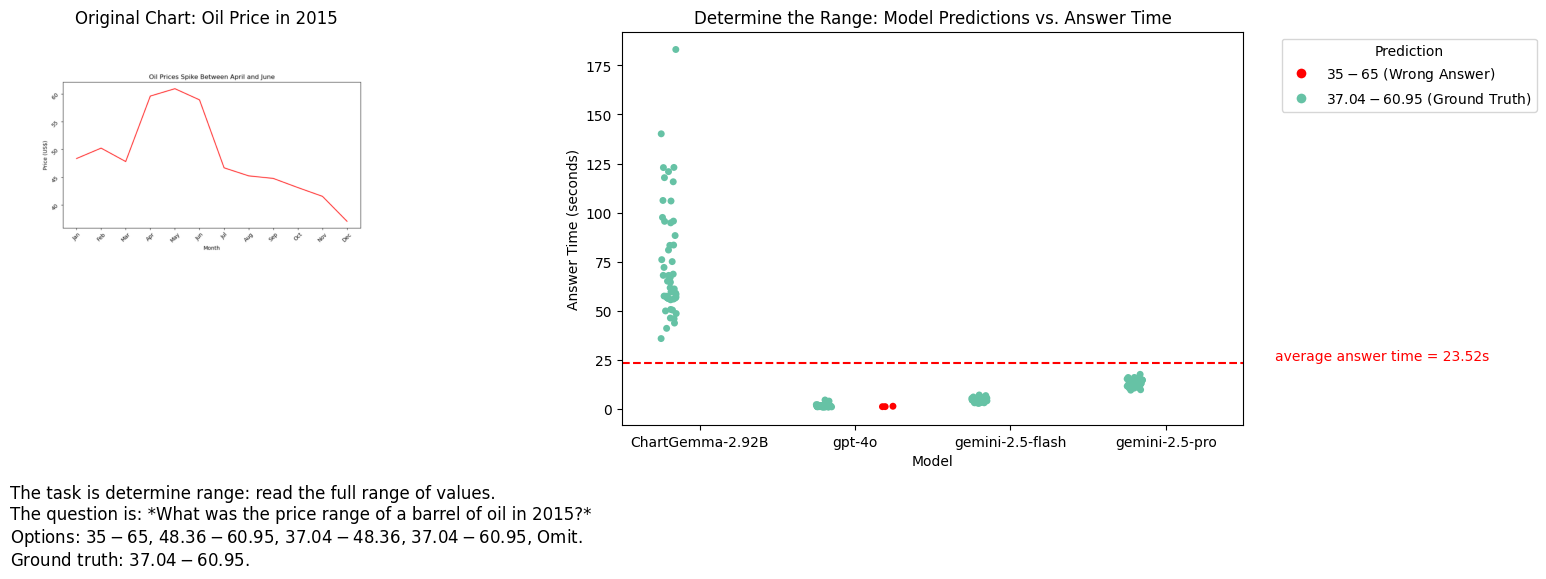

In [20]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import seaborn as sns
from matplotlib.lines import Line2D

# Clean prediction column
merged_df['Prediction'] = merged_df['Prediction'].str.strip().str.rstrip('.')
merged_df['Prediction'] = merged_df['Prediction'].replace(
    "$37.04 - $60.95", "$37.04 - $60.95 (Ground Truth)"
)

# Calculate average answer time
avg_time = merged_df['Answer Time'].mean()

# Define custom palette
palette_custom = {
    "$35 - $65": 'red',
    "$37.04 - $60.95 (Ground Truth)": '#66c2a5'
}

img_np = np.array(cropped_img)

# Side-by-side plot layout
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 6), gridspec_kw={'width_ratios': [1, 1.3]})

# Left: Chart image
ax1.imshow(img)
ax1.axis('off')
ax1.set_title("Original Chart: Oil Price in 2015", fontsize=12)

# Caption under image
caption = (
    "The task is determine range: read the full range of values.\n"
    "The question is: *What was the price range of a barrel of oil in 2015?*\n"
    "Options: $35 - $65, $48.36 - $60.95, $37.04 - $48.36, $37.04 - $60.95, Omit.\n"
    "Ground truth: $37.04 - $60.95."
)

ax1.text(
    0.0, -0.15, caption,
    ha='left',
    va='top',
    fontsize=12,
    transform=ax1.transAxes,
    wrap=True
)

# Right: Model answer time by prediction
sns.stripplot(
    data=merged_df,
    x='Model Name',
    y='Answer Time',
    hue='Prediction',
    dodge=True,
    jitter=True,
    palette=palette_custom,
    ax=ax2
)

ax2.set_title("Determine the Range: Model Predictions vs. Answer Time", fontsize=12)
ax2.set_ylabel("Answer Time (seconds)")
ax2.set_xlabel("Model")

# Average line
ax2.axhline(y=avg_time, color='red', linestyle='--', linewidth=1.5)
ax2.text(
    x=len(merged_df['Model Name'].unique()) - 0.3,
    y=avg_time - 0.3,
    s=f"average answer time = {avg_time:.2f}s",
    color='red',
    fontsize=10,
    ha='left',
    va='bottom'
)

# Custom legend
custom_legend = [
    Line2D([0], [0], marker='o', color='w', label='$35 - $65 (Wrong Answer)', markerfacecolor='red', markersize=8),
    Line2D([0], [0], marker='o', color='w', label='$37.04 - $60.95 (Ground Truth)', markerfacecolor='#66c2a5', markersize=8)
]
ax2.legend(handles=custom_legend, title='Prediction', bbox_to_anchor=(1.05, 1), loc='upper left')

plt.tight_layout()
plt.show()


## Filter and get only the rows where ChatGPT and ChartGemma predicted "$35 - $65"

In [24]:
march_rows_chatgpt = chart_gpt_4o_df[chart_gpt_4o_df['Prediction'].str.strip() == '$35 - $65']
march_rows_chatgpt[['Color', 'Ground Truth', 'Prediction']]

,Color,Ground Truth,Prediction
9,burlywood,$37.04 - $60.95,$35 - $65
19,lightgray,$37.04 - $60.95,$35 - $65
21,lightpink,$37.04 - $60.95,$35 - $65
